### Bar-Plots

In [4]:
import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
sns.set(font_scale=3.5)

In [6]:
with open("data/id2name.json","r")as f:
    id2name = json.load(f)

### Data

In [7]:
data = pd.read_csv('../result/caseolap.csv')
data = data.set_index('protein')
#def rearrang(olddf):
#    col = ['Aged','Diabetes','Hyperlipidemias','Hypertension']
#    newdf = pd.DataFrame()
#    for t in col:
#        newdf[t]= olddf[t]
#    return newdf
#ndf = rearrang(data)
ndf = data
ndf.head()

,CM,ARR,CHD,VD,IHD,CCS,VOO,OHD
protein,,,,,,,,
Q8NEJ9,0.014413,0.000000,0.000000,0.000000,0.015874,0.0,0.000000,0.012219
P05556,0.000000,0.000000,0.008619,0.000000,0.021017,0.0,0.000000,0.000000
Q9BQE4,0.000000,0.000000,0.008653,0.000000,0.012493,0.0,0.000000,0.000000
P38435,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.007688
P28300,0.076751,0.020829,0.029480,0.050782,0.038154,0.0,0.015673,0.047586


In [8]:
ndf.shape

(96, 8)

In [9]:
allp = list(ndf.index)

------------------

#### Bar Plot

In [10]:
sdf = ndf.copy(deep = True)
sdf['sum'] = sum([sdf[x] for x in sdf.columns])
sdf  = sdf.sort_values( ["sum"],axis =0,ascending =False)
sdf = sdf.drop(["sum"], axis = 1)
sdf.head()

,CM,ARR,CHD,VD,IHD,CCS,VOO,OHD
protein,,,,,,,,
Q9HD40,0.077532,0.087786,0.030097,0.140290,0.159544,0.145210,0.155744,0.038130
P16435,0.076345,0.191021,0.040195,0.030107,0.084096,0.142303,0.023649,0.201728
Q92820,0.197668,0.043178,0.242166,0.070638,0.080192,0.044248,0.008574,0.078173
P00750,0.097250,0.078262,0.044655,0.069327,0.234709,0.055376,0.025426,0.048787
P09601,0.253033,0.051767,0.014117,0.030106,0.156748,0.021659,0.024061,0.061653


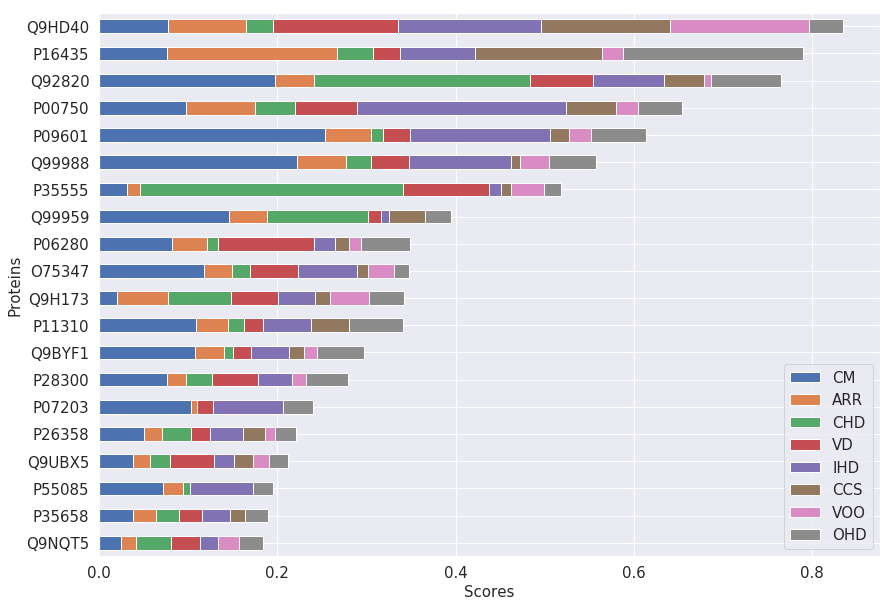

In [11]:
sdf[0:20].plot.barh(stacked=True,figsize=(14, 10),fontsize =15)
plt.legend(fontsize=15)
plt.gca().invert_yaxis()
plt.xlabel('Scores',fontsize =15)
plt.ylabel('Proteins',fontsize =15)
plt.savefig('plots/barplot.pdf')
plt.savefig('plots/barplot.png')

In [14]:
names = []
for item in sdf.index:
    names.append(id2name[item])

sdf['names'] =names

In [15]:
sdf.to_csv("data/barplot-data.csv")